In [1]:
!pip install pycountry-convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 6.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the dataset from Google Drive
data_path = '/content/drive/My Drive/master.csv'  # Adjust the path to your dataset
data = pd.read_csv(data_path, index_col="country")

# Display the first few rows of the DataFrame
data.head()


Mounted at /content/drive


year     sex          age  suicides_no  population  \
country                                                       
Albania  1987    male  15-24 years           21      312900   
Albania  1987    male  35-54 years           16      308000   
Albania  1987  female  15-24 years           14      289700   
Albania  1987    male    75+ years            1       21800   
Albania  1987    male  25-34 years            9      274300   

         suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
country                                                                    
Albania               6.71  Albania1987           NaN      2,156,624,900   
Albania               5.19  Albania1987           NaN      2,156,624,900   
Albania               4.83  Albania1987           NaN      2,156,624,900   
Albania               4.59  Albania1987           NaN      2,156,624,900   
Albania               3.28  Albania1987           NaN      2,156,624,900   

         gdp_per_capita ($)       generation  
country                                       
Albania                 796     Generation X  
Albania                 796           Silent  
Albania                 796     Generation X  
Albania                 796  G.I. Generation  
Albania                 796          Boomers

In [3]:
data.dtypes

year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

Nous allons utiliser les colonnes suivantes :
- country
- year
- sex
- age
- suicides/100k pop
- HDI for year
- gdp_per_capita ($)
- continent

Ces colonnes sont intéressantes pour observer l'évolution des taux de suicide dans le monde en fonction des pays, âges, sexe, niveau de développement et richesses. L'utilisation des valeurs de gdp_per_capita est plus pertinente que gdp_per_year par exemple.

Les autres colonnes ne seront pas utilisés car non utiles.

In [4]:
country_to_drop = ["Mongolia", "Macau", "Cabo Verde", "Dominica", "Bosnia and Herzegovina", "San Marino", "Saint Kitts and Nevis"]

data = data.drop(country_to_drop, axis=0)


In [5]:
data = data.reset_index()

In [6]:
data = data[data["year"] != 2016]
data["country"]=data["country"].replace('Republic of Korea', 'Korea, Republic of')
data["country"] = data["country"].replace('Saint Vincent and Grenadines', 'Saint Vincent and the Grenadines')
data["country"].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
       'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Korea, Republic of', 'Romania',
       'Russian Federation', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 

In [7]:
import pycountry_convert as pc
data['continent'] = [pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country, cn_name_format="default")) for country in data['country']]
data.head()


/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation continent  
0                 796     Generation X        EU  
1                 796           Silent        EU  
2                 796     Generation X        EU  
3                 796  G.I. Generation        EU  
4                 796          Boomers        EU

# Taux de suicide par an dans le monde

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


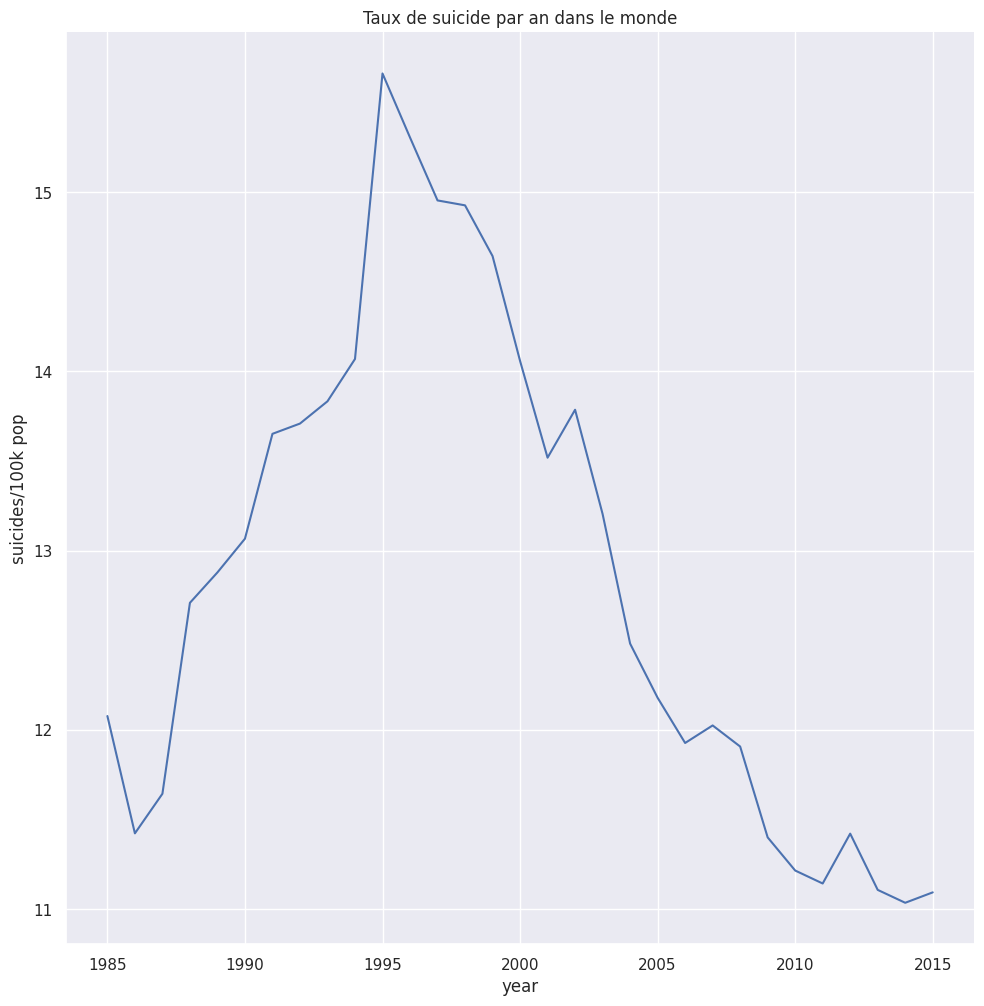

In [8]:
sns.set(rc={'figure.figsize':(30,30)}) # fonctionne pas
# fig.set_size_inches(20, 20)

ax = sns.relplot(x="year", y="suicides/100k pop",ci=None,kind="line", data=data, height = 10).set(title = "Taux de suicide par an dans le monde")

# g.fig.autofmt_xdate()

On remarque que le taux de suicide augmente à partir de 1988 et atteint son maximum en 1995 avant de commencer à retomber en 1997 et ce jusqu'en 2015.

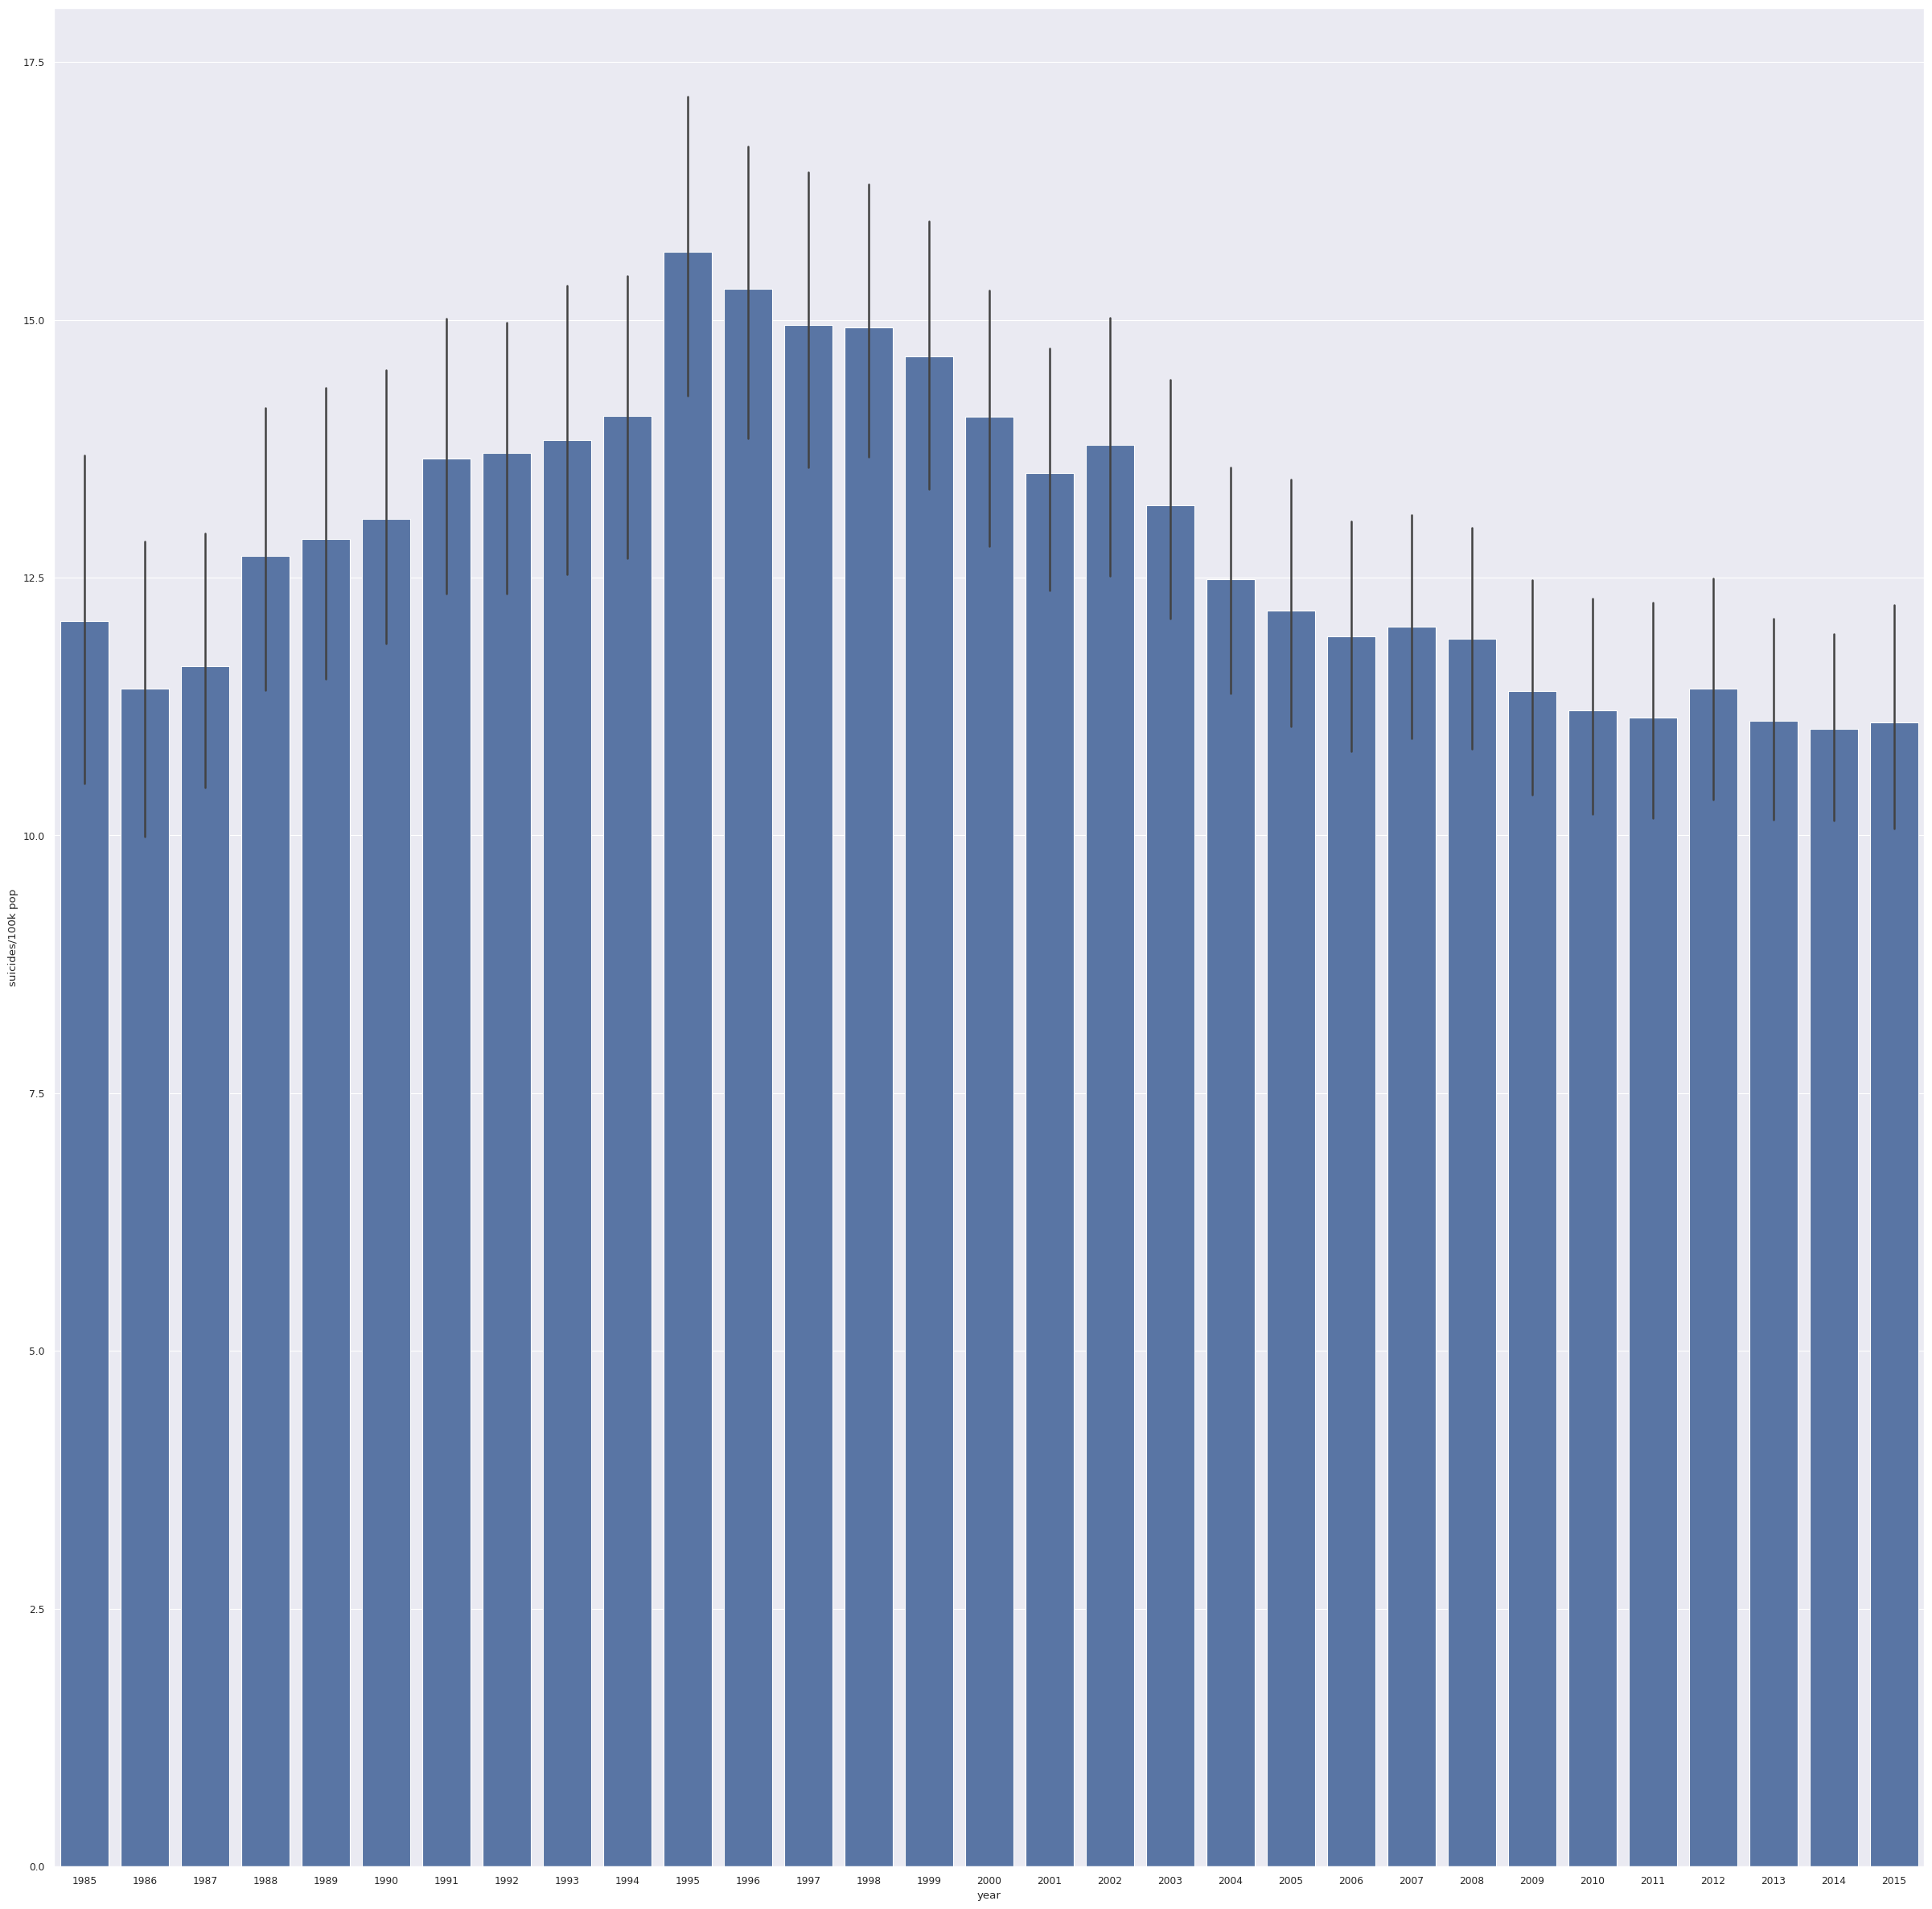

In [9]:
sns.set_style()
sns.set_context('paper')
ax = sns.barplot(x="year", y="suicides/100k pop", data=data)

# Taux de suicide par an réparti par sexe

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


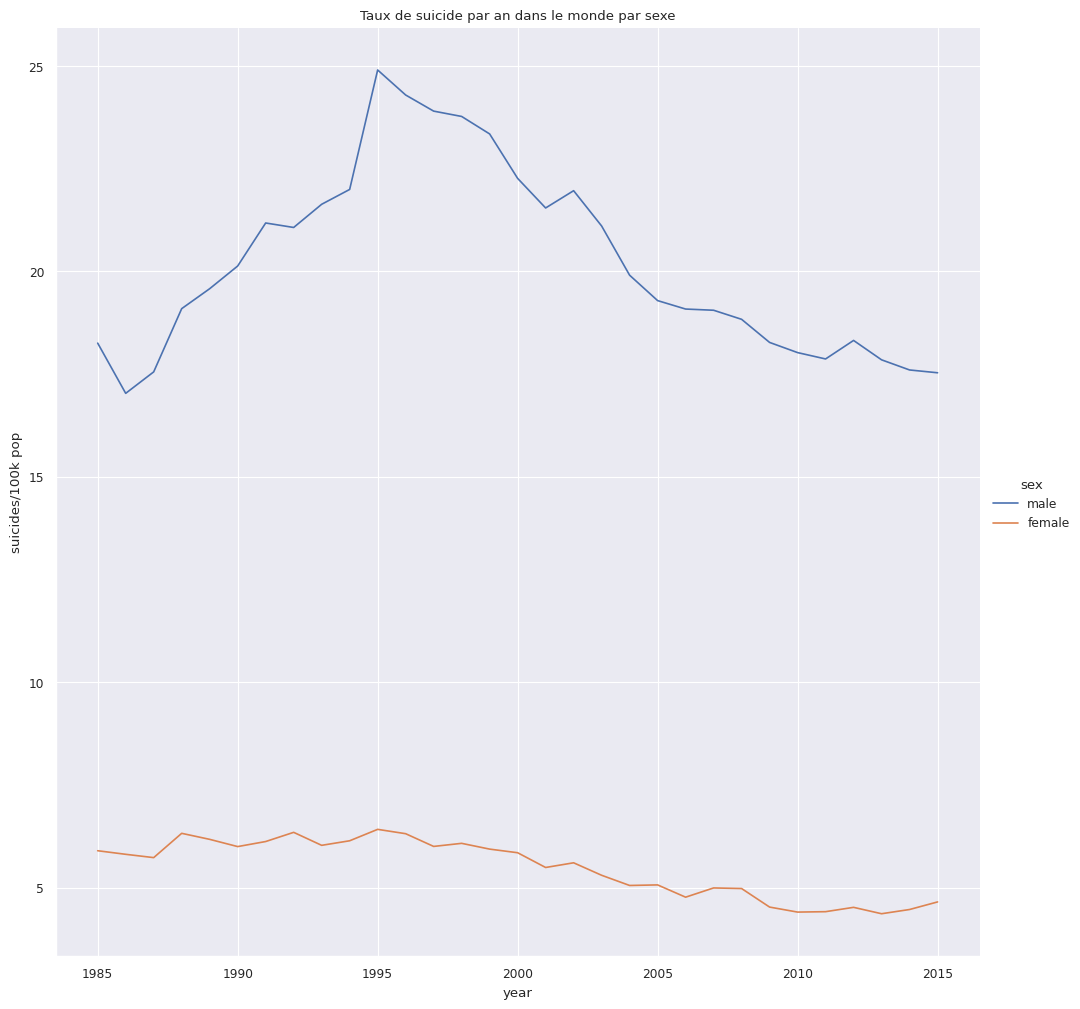

In [10]:
sns.relplot(x="year", y="suicides/100k pop", hue="sex", ci=None, kind="line", data=data, height = 10).set(title = "Taux de suicide par an dans le monde par sexe")

Dans ce graphe, on remarque qu'il y a beaucoup de suicide masculin.

On peut voir que le taux de suicide chez les femmes représente presque un quart de celui des hommes.

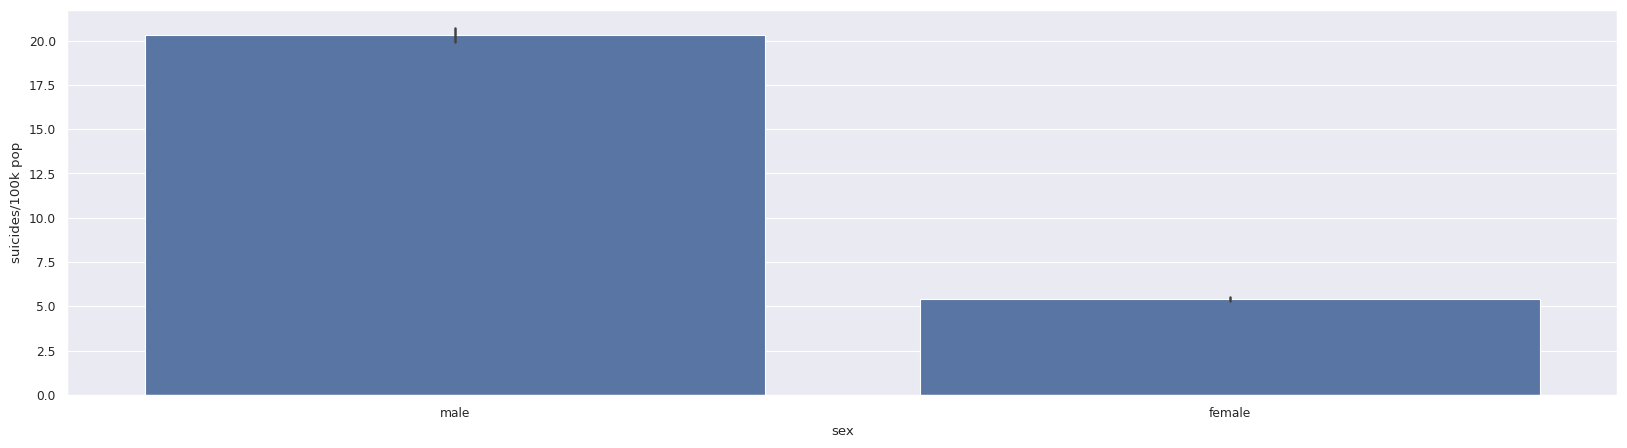

In [11]:
plt.figure(figsize=(20,5))
sns.set_style()
sns.set_context('paper')
ax = sns.barplot(y="suicides/100k pop", x="sex", data=data)

Le graphique suivant montre le nombre de mort chez les hommes et femmes.
On observe une nette différence entre le taux de suicide chez entre les hommes et les femmes.

# Taux de suicide par an dans le monde en fonction de la tranche d'âge

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


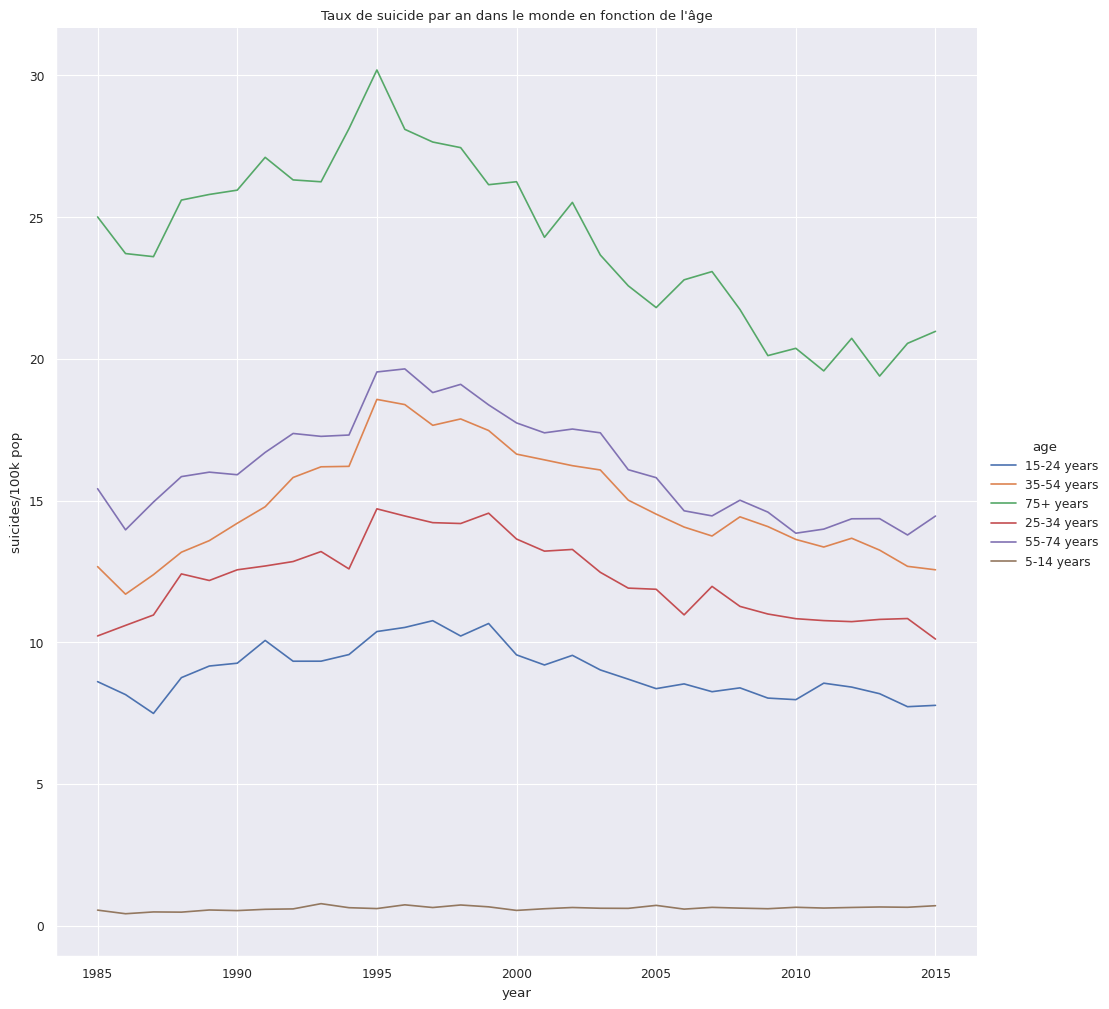

In [12]:
sns.relplot(x="year", y="suicides/100k pop", hue="age", ci=None, kind="line", data=data, height = 10).set(title = "Taux de suicide par an dans le monde en fonction de l'âge")

Le graphique suivant montre le taux de suicide dans les différents groupes d'âge.
On peut observer que les plus de 75 sont les plus concernés par le suicide.

On remarque que le taux de suicide augmente en fonction de l'âge.
On peut poser comme hypothése que l'âge et la maladie ( et la solitude) peuvent avoir un rapport avec le suicide .

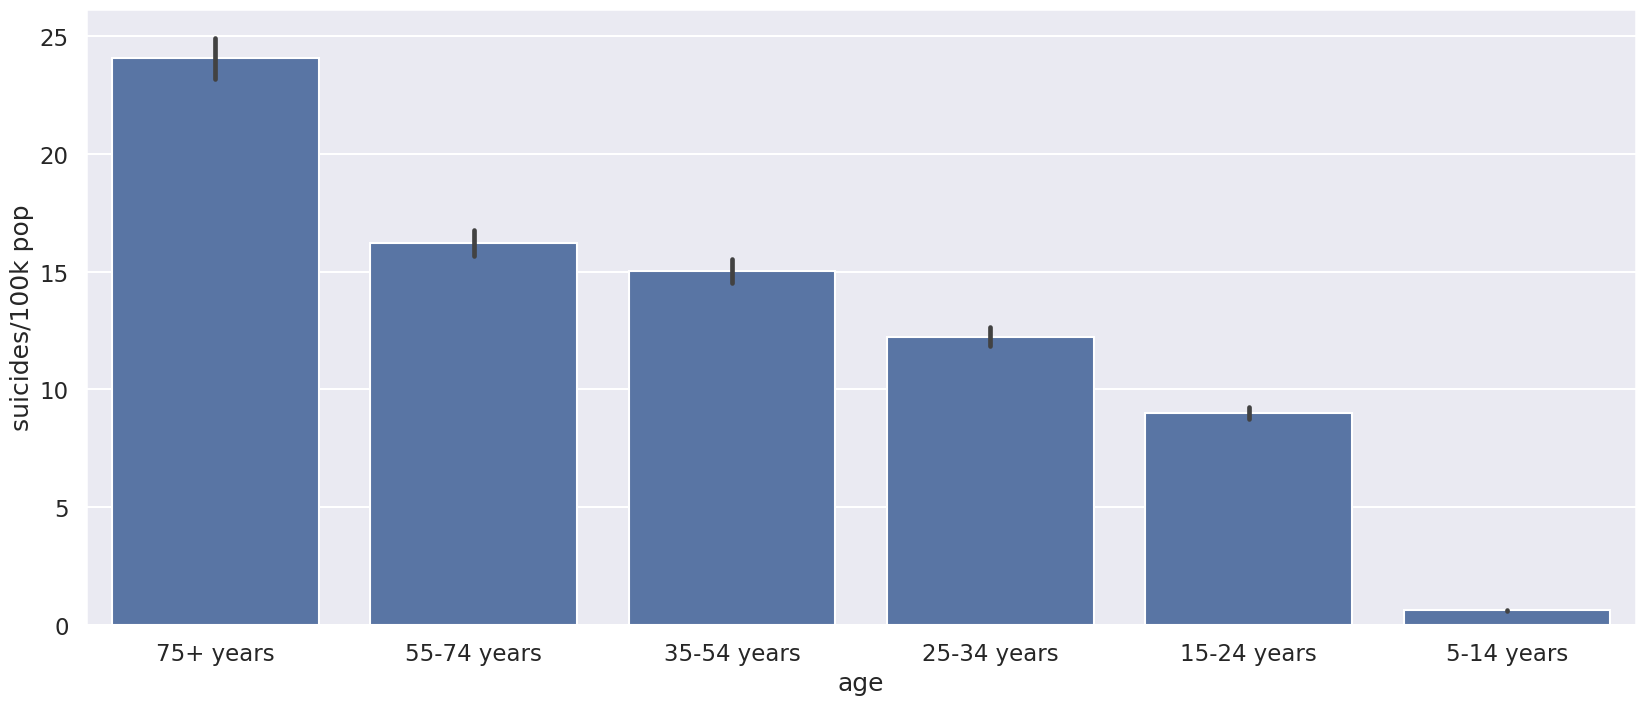

In [13]:
plt.figure(figsize=(20,8))
sns.set_style()
sns.set_context('talk')
ax = sns.barplot(y="suicides/100k pop", x="age", order = ['75+ years','55-74 years','35-54 years','25-34 years','15-24 years','5-14 years'],data=data)

# Taux de suicides dans le monde par âge et sexe

Ici nous remarquons que dans toutes les tranches d'âge, les hommes se suicident beaucoup plus que les femmes.

<Axes: title={'center': 'Suicides by age and sex'}, xlabel='age', ylabel='suicides/100k pop'>

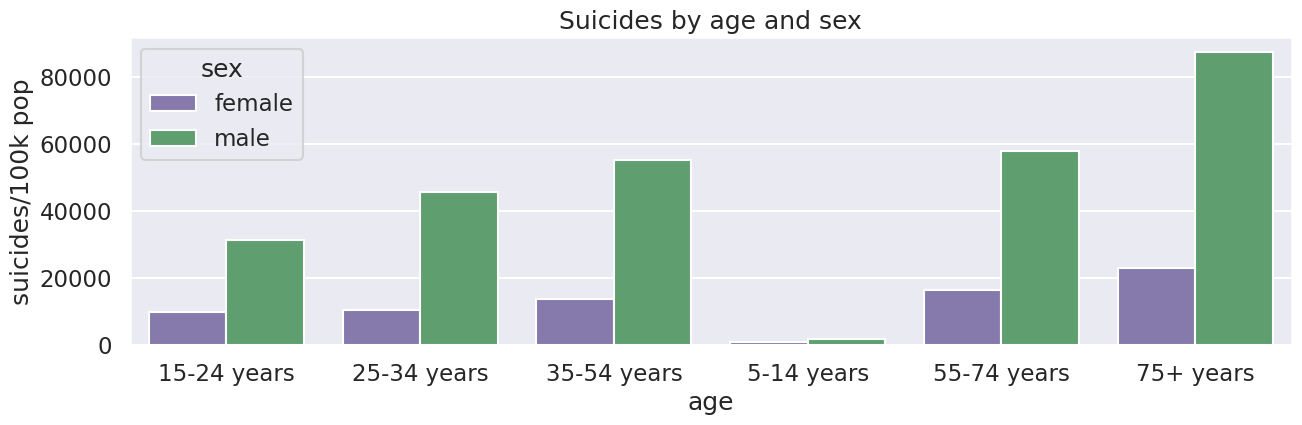

In [14]:
byAge = data.groupby(['sex', 'age']).agg(sum)
byAge = byAge.reset_index().sort_values(by = 'age', ascending=True)
fig = plt.figure(figsize=(15,4))
plt.title('Suicides by age and sex')
sns.barplot(y='suicides/100k pop', x='age', hue='sex', data=byAge, palette={'male': 'g', 'female': 'm'})

Le graphique suivant montre le nombre de mort chez les hommes et femmes.
On observe une nette différence entre le taux de suicide chez entre les hommes et les femmes.

# World Map

Grâce à cette map, on peut avoir un aperçu sur les suicides par pays

In [15]:
!pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.4 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


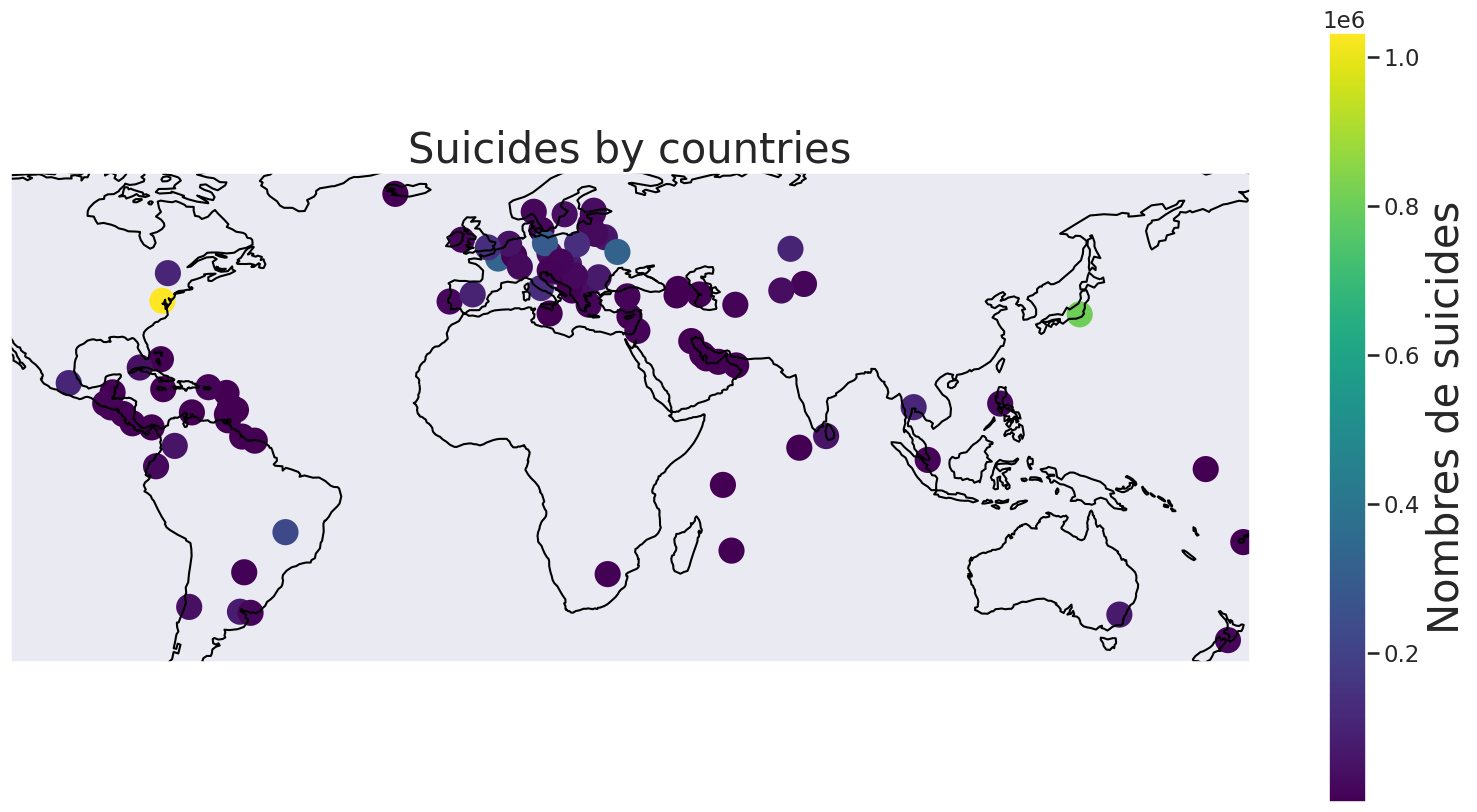

In [16]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file from Google Drive
concap_path = '/content/drive/My Drive/concap.csv'
concap = pd.read_csv(concap_path)

by_country = data.groupby(['country']).agg(sum)

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']], by_country, left_on='CountryName', right_on='country')

def mapWorld(col, size, title, label, metr=100, colmap='hot'):
    fig = plt.figure(figsize=(20, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full[col].values
    if size:
        a_2 = data_full[size].values
    else:
        a_2 = 1

    sc = ax.scatter(lon, lat, transform=ccrs.PlateCarree(), c=a_1, s=metr*a_2, cmap=colmap)
    cbar = fig.colorbar(sc)
    cbar.set_label(label, fontsize=30)
    plt.title(title, fontsize=30)
    plt.show()

mapWorld(col='suicides_no', size=False, title='Suicides by countries', label='Nombres de suicides', metr=300, colmap='viridis')


# Analyses by continent

In [17]:
# Remplacement du code continent par le nom
Continent_dict={'AF':'Africa', 'AS':'Asia', 'EU':'Europe', 'NA':'North America', 'OC':'Oceania', 'SA':'South America'}
data=data.replace(Continent_dict)

continent_group=data.groupby(['continent']).sum().reset_index()
continent_group.sort_values('suicides/100k pop', ascending=False)

continent                                            country      year  \
2         Europe  AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...  22552224   
1           Asia  ArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArme...  10617996   
3  North America  Antigua and BarbudaAntigua and BarbudaAntigua ...  12003840   
5  South America  ArgentinaArgentinaArgentinaArgentinaArgentinaA...   6312348   
4        Oceania  AustraliaAustraliaAustraliaAustraliaAustraliaA...   1943880   
0         Africa  MauritiusMauritiusMauritiusMauritiusMauritiusM...   1658256   

                                                 sex  \
2  malemalefemalemalemalefemalefemalefemalemalefe...   
1  malemalemalemalefemalemalefemalefemalefemalefe...   
3  femalefemalefemalefemalefemalefemalemalemalema...   
5  malemalemalefemalemalefemalemalefemalefemalefe...   
4  malemalemalemalemalefemalefemalefemalefemalefe...   
0  femalemalemalemalemalefemalefemalefemalefemale...   

                                                 age  suicides_no  \
2  15-24 years35-54 years15-24 years75+ years25-3...      3397331   
1  35-54 years75+ years55-74 years25-34 years35-5...      1451410   
3  15-24 years25-34 years35-54 years5-14 years55-...      1340639   
5  75+ years55-74 years35-54 years55-74 years25-3...       446980   
4  75+ years25-34 years55-74 years15-24 years35-5...        84851   
0  75+ years25-34 years35-54 years55-74 years15-2...        11215   

    population  suicides/100k pop  \
2  18772607414          197637.73   
1  10092708389           58093.40   
3  12746092945           44583.61   
5   8008918797           36069.12   
4    654397213           11238.10   
0    906943055            6212.47   

                                        country-year  HDI for year  \
2  Albania1987Albania1987Albania1987Albania1987Al...      2962.608   
1  Armenia1990Armenia1990Armenia1990Armenia1990Ar...      1220.736   
3  Antigua and Barbuda1985Antigua and Barbuda1985...      1200.396   
5  Argentina1985Argentina1985Argentina1985Argenti...       692.796   
4  Australia1985Australia1985Australia1985Austral...       207.828   
0  Mauritius1985Mauritius1985Mauritius1985Mauriti...       193.644   

                                   gdp_for_year ($)   gdp_per_capita ($)  \
2  2,156,624,9002,156,624,9002,156,624,9002,156,6...           268835304   
1  2,256,838,8582,256,838,8582,256,838,8582,256,8...            82009284   
3  240,923,926240,923,926240,923,926240,923,92624...            70019220   
5  88,416,668,90088,416,668,90088,416,668,90088,4...            15891984   
4  180,190,994,861180,190,994,861180,190,994,8611...            20184936   
0  1,080,642,0331,080,642,0331,080,642,0331,080,6...             5640960   

                                          generation  
2  Generation XSilentGeneration XG.I. GenerationB...  
1  SilentG.I. GenerationG.I. GenerationBoomersSil...  
3  Generation XBoomersSilentGeneration XG.I. Gene...  
5  G.I. GenerationG.I. GenerationSilentG.I. Gener...  
4  G.I. GenerationBoomersG.I. GenerationGeneratio...  
0  G.I. GenerationBoomersSilentG.I. GenerationGen...

<ipython-input-18-baff6862cd44>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=continent_group.sort_values('suicides/100k pop', ascending=False), x='continent', y='suicides/100k pop', ci=None, palette=palette)
<ipython-input-18-baff6862cd44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=continent_group.sort_values('suicides/100k pop', ascending=False), x='continent', y='suicides/100k pop', ci=None, palette=palette)
<ipython-input-18-baff6862cd44>:3: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  ax = sns.barplot(data=continent_group.sort_values('suicides/100k pop', ascending=False), x='continent', y='suicides/100k pop', ci=None, palette=palette)


Text(0.5, 1.0, 'Suicides by continent (1985-2015)')

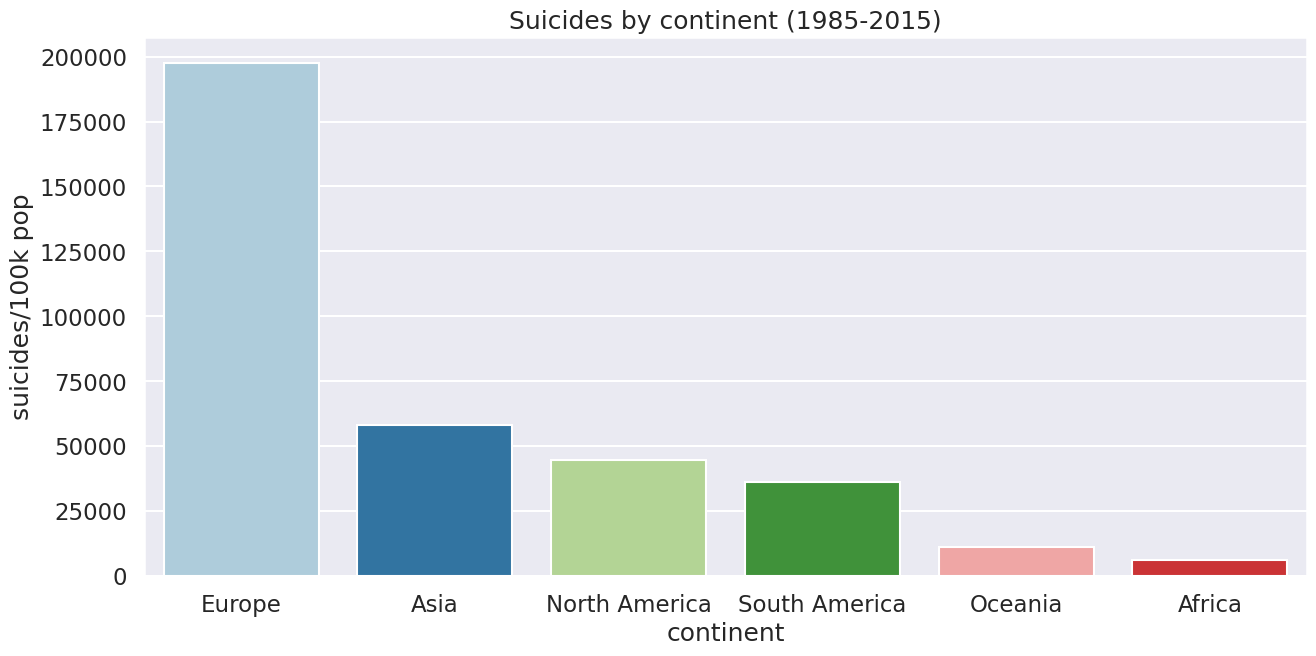

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
palette = sns.color_palette("Paired")
ax = sns.barplot(data=continent_group.sort_values('suicides/100k pop', ascending=False), x='continent', y='suicides/100k pop', ci=None, palette=palette)
ax.set_title('Suicides by continent (1985-2015)')

# Evolution en fonction du temps

Text(0.5, 0.98, 'Suicide trends over time by continents (1985-2015)')

<Figure size 2000x1000 with 0 Axes>

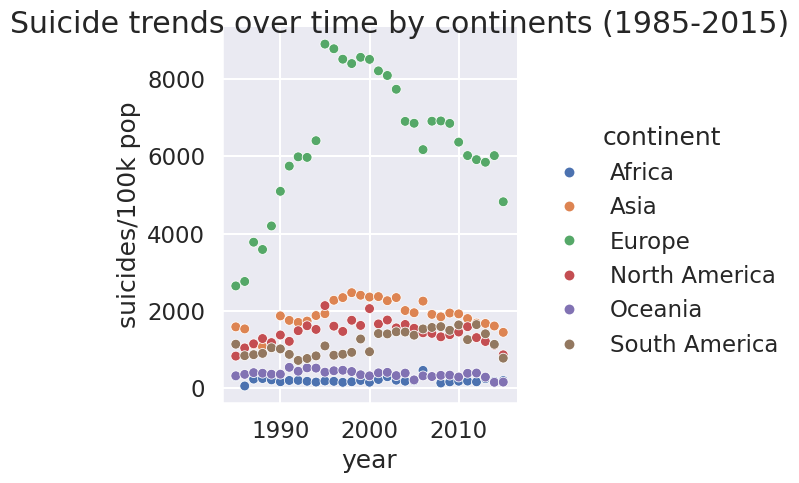

In [19]:
continent_time=data.groupby(['year','continent']).agg({'suicides/100k pop':sum}).reset_index()
continent_time
plt.figure(figsize=(20,10))
ax = sns.relplot(data=continent_time, x='year', y='suicides/100k pop', hue='continent',s=50)
ax.fig.suptitle('Suicide trends over time by continents (1985-2015)')

In [20]:
continent_time_wo_europe = continent_time[continent_time["continent"] != 'Europe']
continent_time_wo_europe

year      continent  suicides/100k pop
0    1985         Africa             299.31
1    1985           Asia            1585.09
3    1985  North America             828.04
4    1985        Oceania             317.05
5    1985  South America            1136.51
..    ...            ...                ...
180  2015         Africa             194.22
181  2015           Asia            1443.26
183  2015  North America             860.65
184  2015        Oceania             154.18
185  2015  South America             775.07

[155 rows x 3 columns]

Text(0.5, 0.98, 'Suicide trends over time by continents excepting Europe (1985-2015)')

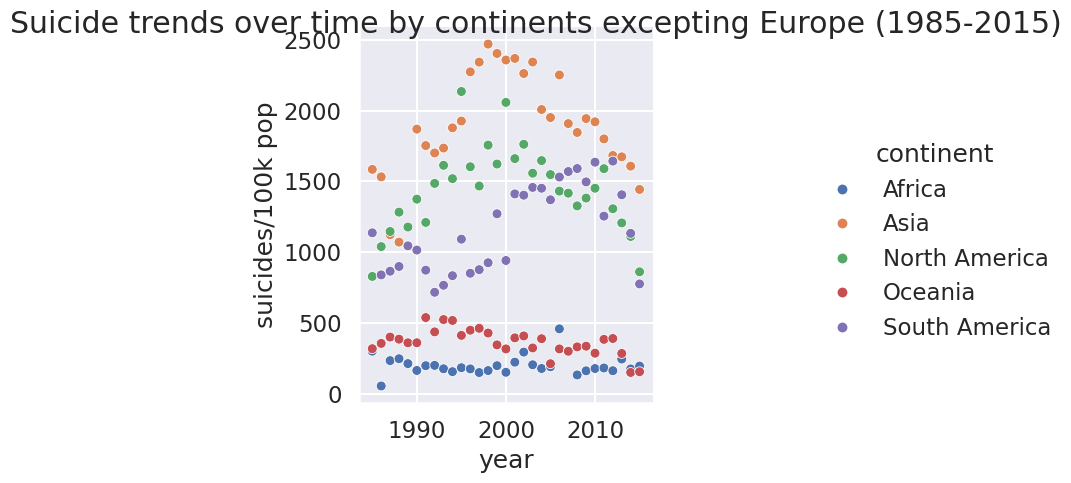

In [21]:
continent_time
#plt.figure(figsize=(20,20))
ax = sns.relplot(data=continent_time_wo_europe, x='year', y='suicides/100k pop', hue='continent',s=50)
ax.fig.suptitle('Suicide trends over time by continents excepting Europe (1985-2015)')

* Le taux européen est globalement le plus élevé, mais a régulièrement diminué ~ 40% depuis 1995
* La tendance pour l'Afrique est due à la mauvaise qualité des données - seulement 3 pays ont fourni des données

# Comparaison par sexe et par continent

In [22]:
continent_sex=data.groupby(['sex','continent']).agg({'suicides/100k pop':sum}).reset_index()
continent_sex

sex      continent  suicides/100k pop
0   female         Africa            1263.86
1   female           Asia           15349.84
2   female         Europe           40777.15
3   female  North America            7545.18
4   female        Oceania            2371.95
5   female  South America            7206.58
6     male         Africa            4948.61
7     male           Asia           42743.56
8     male         Europe          156860.58
9     male  North America           37038.43
10    male        Oceania            8866.15
11    male  South America           28862.54

Text(0.5, 1.0, 'Suicides by continent and gender (1985-2015)')

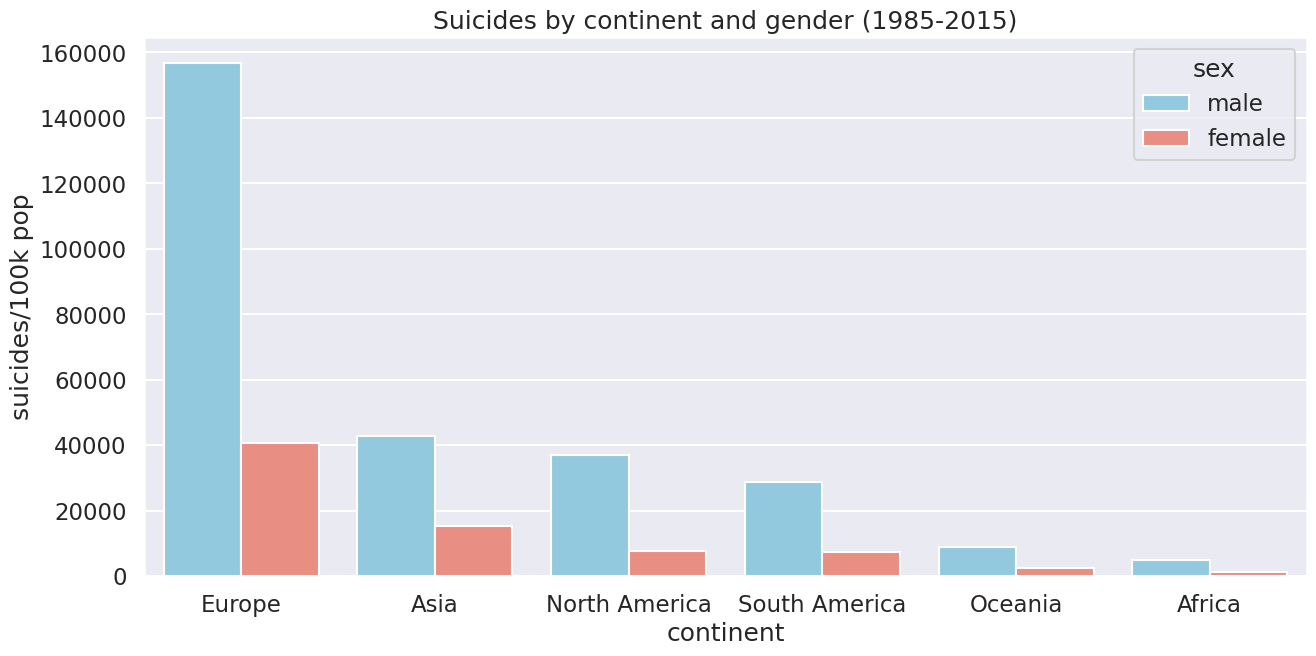

In [23]:

# Set your custom color palette
colors = ["skyblue", "salmon"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(data=continent_sex.sort_values('suicides/100k pop', ascending=False), x='continent', y='suicides/100k pop', hue='sex',palette=sns.set_palette(sns.color_palette(colors)))
ax.set_title('Suicides by continent and gender (1985-2015)')

# Comparaison par age et par continent

<ipython-input-24-e86a34763cea>:5: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  ax = sns.barplot(data=continent_age.sort_values('suicides/100k pop', ascending=False), x='continent', y='suicides/100k pop', hue='age',palette=palette)


Text(0.5, 1.0, 'Suicides by continent and age (1985-2015)')

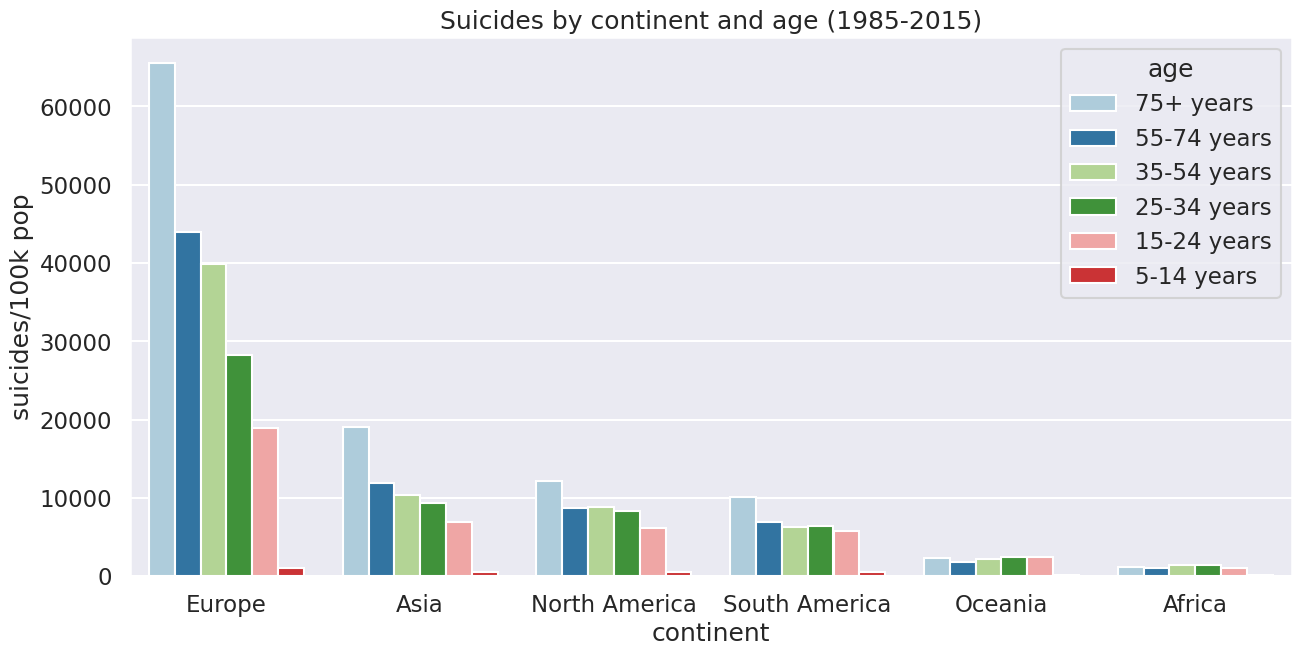

In [24]:
continent_age=data.groupby(['age','continent']).agg({'suicides/100k pop':sum}).reset_index()
continent_age
palette=sns.color_palette("Paired", 9)
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(data=continent_age.sort_values('suicides/100k pop', ascending=False), x='continent', y='suicides/100k pop', hue='age',palette=palette)
ax.set_title('Suicides by continent and age (1985-2015)')

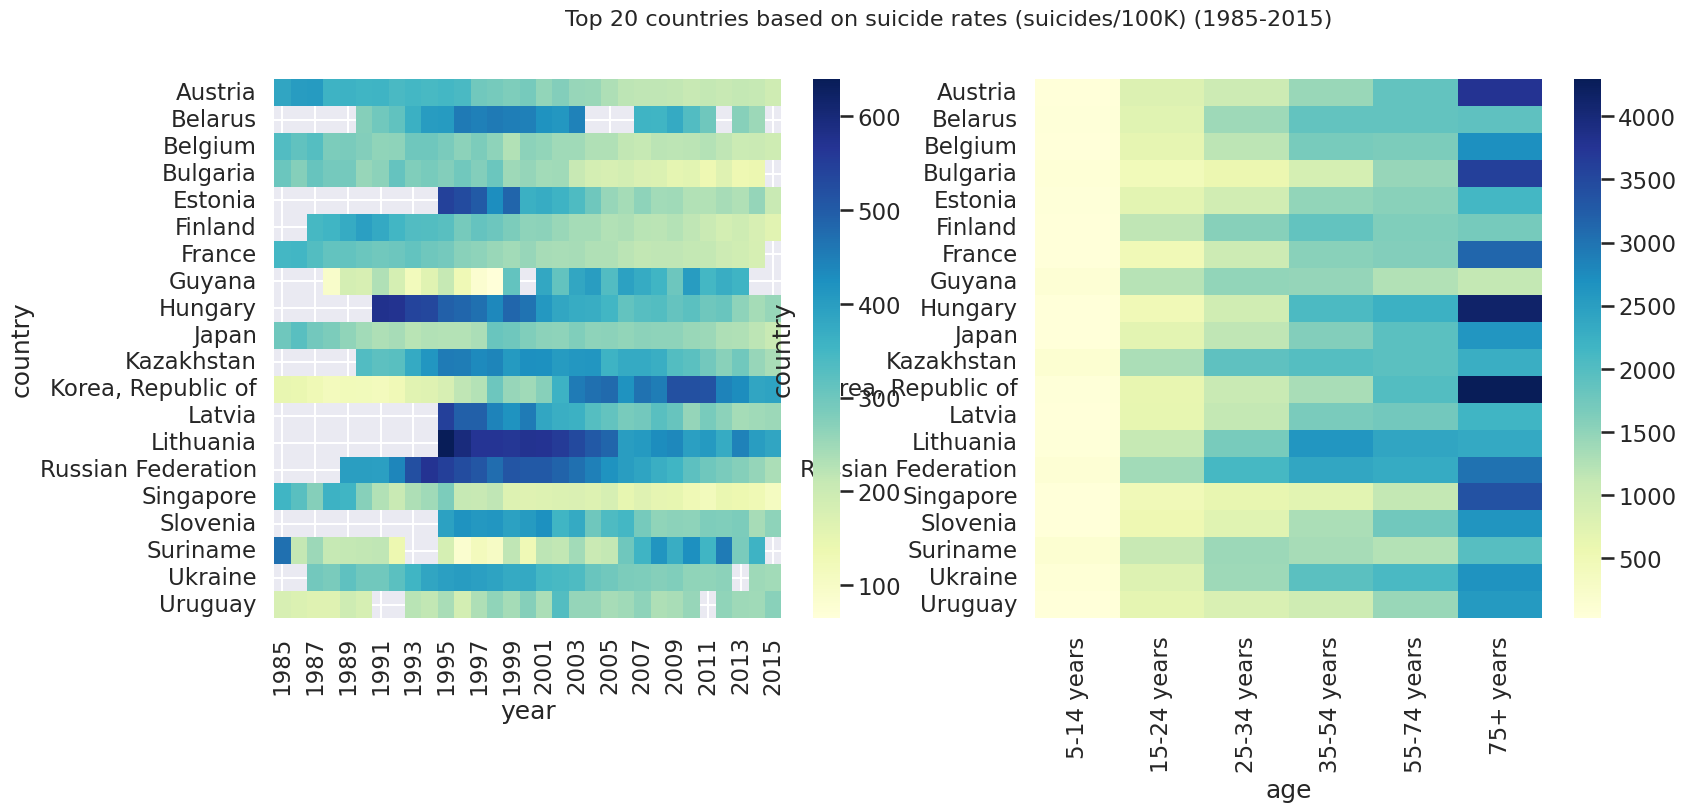

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

top20=data.groupby(['country']).agg({'suicides/100k pop':sum}).reset_index().sort_values('suicides/100k pop', ascending=False)[0:20]
top20_list=[country for country in top20['country'].unique()]

data_top20=data[data['country'].isin(top20_list)]

data_top20_group_year=data_top20.groupby(['country','year']).agg({'suicides/100k pop':sum})

heatmap_data_year=data_top20_group_year.reset_index().pivot(index='country', columns='year', values='suicides/100k pop')

data_top20_group_age=data_top20.groupby(['country','age']).agg({'suicides/100k pop':sum})

heatmap_data_age=data_top20_group_age.reset_index().pivot(index='country', columns='age', values='suicides/100k pop')
heatmap_data_age=heatmap_data_age.reindex(['5-14 years','15-24 years', '25-34 years', '35-54 years','55-74 years', '75+ years'], axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18, 7))
sns.heatmap(heatmap_data_year,cmap="YlGnBu", ax=axes[0])
sns.heatmap(heatmap_data_age,cmap="YlGnBu", ax=axes[1])
fig.suptitle('Top 20 countries based on suicide rates (suicides/100K) (1985-2015)', fontsize=16)

plt.show()


Dans l'ensemble, les suicides ont nettement diminué dans la plupart des pays. La Hongrie, la Lituanie et la Russie ont enregistré le nombre maximal de suicides, mais même ces pays ont connu une baisse des taux de suicide au cours des années 2000. Cependant, il existe des pays comme le Suriname, la Corée et la Guyane où les taux de suicide ont augmenté. La Corée n'avait enregistré que 65 cas de suicides en 1995, après 2000, le taux de suicide est passé à 600 avant de redescendre lègerement après 2010 (raisons : pression scolaire insoutenable pour les jeunes et dans le cas des persones agès : sentiment d’ostracisme social croissant ressenti par les personnes âgées et la perte de respect de la part des jeunes populations.

# Suicide vs HDI

L'indice de développement humain ou IDH (en anglais, human development index ou HDI) est un indice statistique composite pour évaluer le taux de développement humain des pays du monde. L'IDH se fondait alors sur trois critères :
* le PIB par habitant
* l'espérance de vie à la naissance
* le niveau d'éducation des enfants de 17 ans et plus

Nous pouvons penser qu'un pays plus développé a un taux de suicide inférieur aux pays moins développés.

In [28]:
pd.isnull(data["HDI for year"]).value_counts()

HDI for year
True     19188
False     8340
Name: count, dtype: int64

Le nombre de données est faible mais suffisant pour avoir une idée.

In [29]:
data_hdi = data[~data["HDI for year"].isna()]

In [30]:
data_hdi

country  year     sex          age  suicides_no  population  \
72        Albania  1995    male  25-34 years           13      232900   
73        Albania  1995    male  55-74 years            9      178000   
74        Albania  1995  female    75+ years            2       40800   
75        Albania  1995  female  15-24 years           13      283500   
76        Albania  1995    male  15-24 years           11      241200   
...           ...   ...     ...          ...          ...         ...   
27673  Uzbekistan  2014  female  35-54 years          107     3620833   
27674  Uzbekistan  2014  female    75+ years            9      348465   
27675  Uzbekistan  2014    male   5-14 years           60     2762158   
27676  Uzbekistan  2014  female   5-14 years           44     2631600   
27677  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
72                  5.58     Albania1995         0.619      2,424,499,009   
73                  5.06     Albania1995         0.619      2,424,499,009   
74                  4.90     Albania1995         0.619      2,424,499,009   
75                  4.59     Albania1995         0.619      2,424,499,009   
76                  4.56     Albania1995         0.619      2,424,499,009   
...                  ...             ...           ...                ...   
27673               2.96  Uzbekistan2014         0.675     63,067,077,179   
27674               2.58  Uzbekistan2014         0.675     63,067,077,179   
27675               2.17  Uzbekistan2014         0.675     63,067,077,179   
27676               1.67  Uzbekistan2014         0.675     63,067,077,179   
27677               1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita ($)       generation continent  
72                    835     Generation X    Europe  
73                    835           Silent    Europe  
74                    835  G.I. Generation    Europe  
75                    835     Generation X    Europe  
76                    835     Generation X    Europe  
...                   ...              ...       ...  
27673                2309     Generation X      Asia  
27674                2309           Silent      Asia  
27675                2309     Generation Z      Asia  
27676                2309     Generation Z      Asia  
27677                2309          Boomers      Asia  

[8340 rows x 13 columns]

In [31]:
data_hdi = data_hdi.reset_index()
data_hdi

index     country  year     sex          age  suicides_no  population  \
0        72     Albania  1995    male  25-34 years           13      232900   
1        73     Albania  1995    male  55-74 years            9      178000   
2        74     Albania  1995  female    75+ years            2       40800   
3        75     Albania  1995  female  15-24 years           13      283500   
4        76     Albania  1995    male  15-24 years           11      241200   
...     ...         ...   ...     ...          ...          ...         ...   
8335  27673  Uzbekistan  2014  female  35-54 years          107     3620833   
8336  27674  Uzbekistan  2014  female    75+ years            9      348465   
8337  27675  Uzbekistan  2014    male   5-14 years           60     2762158   
8338  27676  Uzbekistan  2014  female   5-14 years           44     2631600   
8339  27677  Uzbekistan  2014  female  55-74 years           21     1438935   

      suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                  5.58     Albania1995         0.619      2,424,499,009   
1                  5.06     Albania1995         0.619      2,424,499,009   
2                  4.90     Albania1995         0.619      2,424,499,009   
3                  4.59     Albania1995         0.619      2,424,499,009   
4                  4.56     Albania1995         0.619      2,424,499,009   
...                 ...             ...           ...                ...   
8335               2.96  Uzbekistan2014         0.675     63,067,077,179   
8336               2.58  Uzbekistan2014         0.675     63,067,077,179   
8337               2.17  Uzbekistan2014         0.675     63,067,077,179   
8338               1.67  Uzbekistan2014         0.675     63,067,077,179   
8339               1.46  Uzbekistan2014         0.675     63,067,077,179   

      gdp_per_capita ($)       generation continent  
0                    835     Generation X    Europe  
1                    835           Silent    Europe  
2                    835  G.I. Generation    Europe  
3                    835     Generation X    Europe  
4                    835     Generation X    Europe  
...                  ...              ...       ...  
8335                2309     Generation X      Asia  
8336                2309           Silent      Asia  
8337                2309     Generation Z      Asia  
8338                2309     Generation Z      Asia  
8339                2309          Boomers      Asia  

[8340 rows x 14 columns]

In [32]:
data_hdi_group = data_hdi.groupby(["country","year"])[["HDI for year","suicides/100k pop"]].mean().reset_index()

In [33]:
data_hdi_group

country  year  HDI for year  suicides/100k pop
0                Albania  1995         0.619           3.379167
1                Albania  2000         0.656           2.558333
2                Albania  2005         0.695           0.000000
3                Albania  2010         0.722           3.471667
4    Antigua and Barbuda  2012         0.781           0.000000
..                   ...   ...           ...                ...
690           Uzbekistan  2010         0.655           5.269167
691           Uzbekistan  2011         0.661           5.595000
692           Uzbekistan  2012         0.668           6.460833
693           Uzbekistan  2013         0.672           6.571667
694           Uzbekistan  2014         0.675           7.093333

[695 rows x 4 columns]

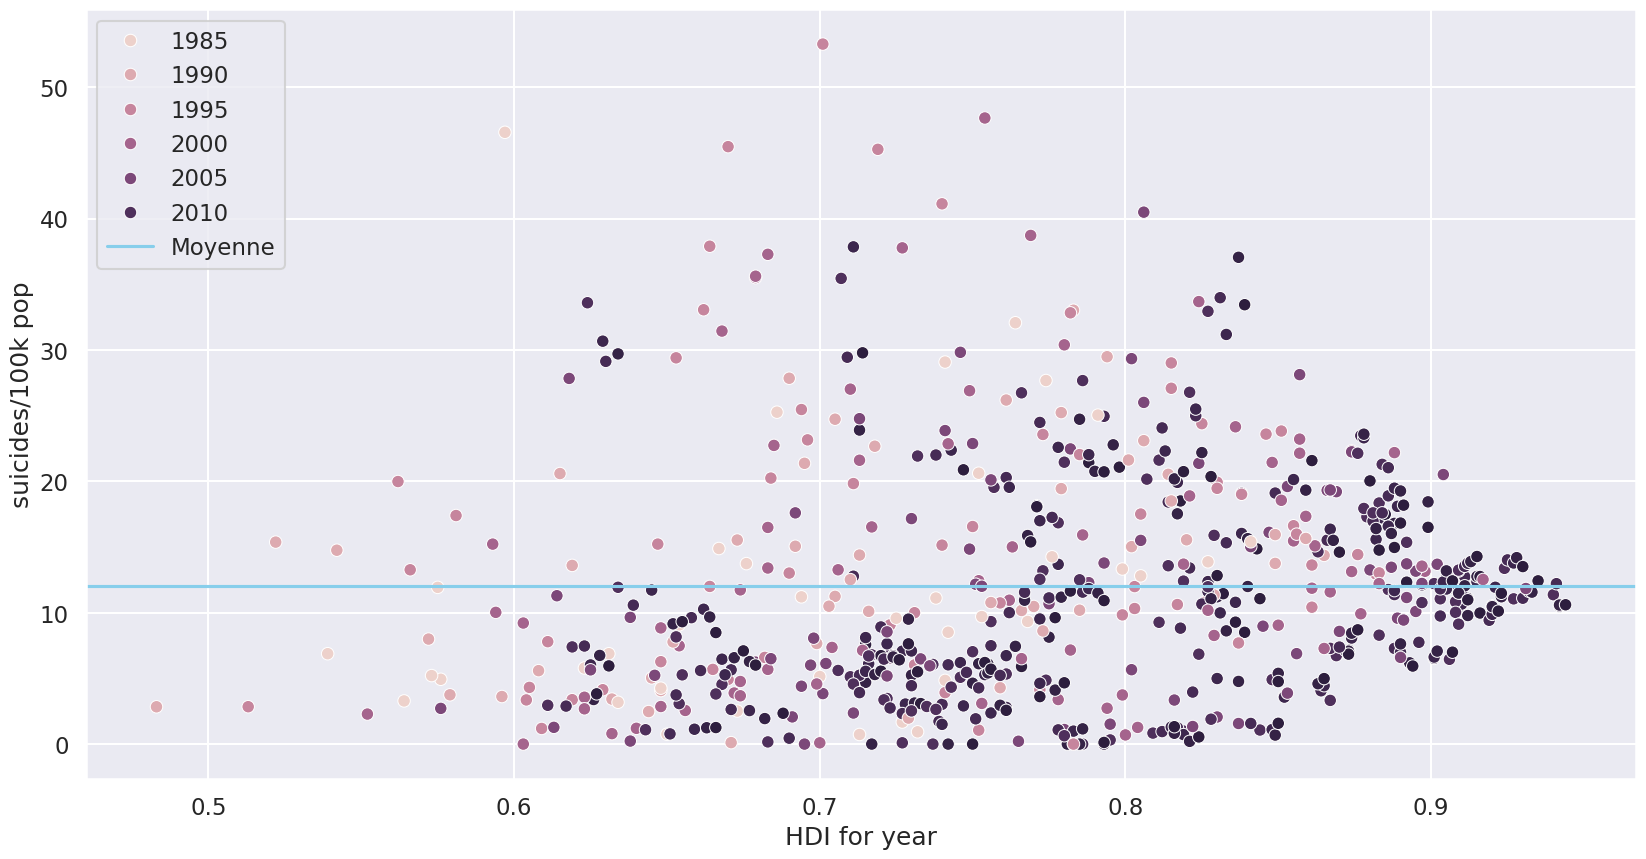

In [34]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="HDI for year", y="suicides/100k pop", data=data_hdi_group, hue = "year")
plt.axhline(data_hdi_group["suicides/100k pop"].mean(), label = "Moyenne")
plt.legend(loc='upper left')

Ce graphe reprend tous les points de moyenne de suicide par 100k habitants pour chaque pays tous les ans.

Ce graphe nous montre que la situation varie grandement en fonction du niveau de développement du pays.

Deux éléments :
- Les pays les plus développés possèdent un nombre moyen de suicide qui se rapproche de la moyenne mondiale mais ne tend pas vers 0.
- Il est possible que certains comptages soient érronés pour les pays les moins développés du fait d'une déficience possible du système qui potentiellement sous-estime ou surestime le nombre de suicides.

Nous pouvons regarder l'évolution au cours du temps pour observer l'impact du développement des pays sur le taux de suicide.

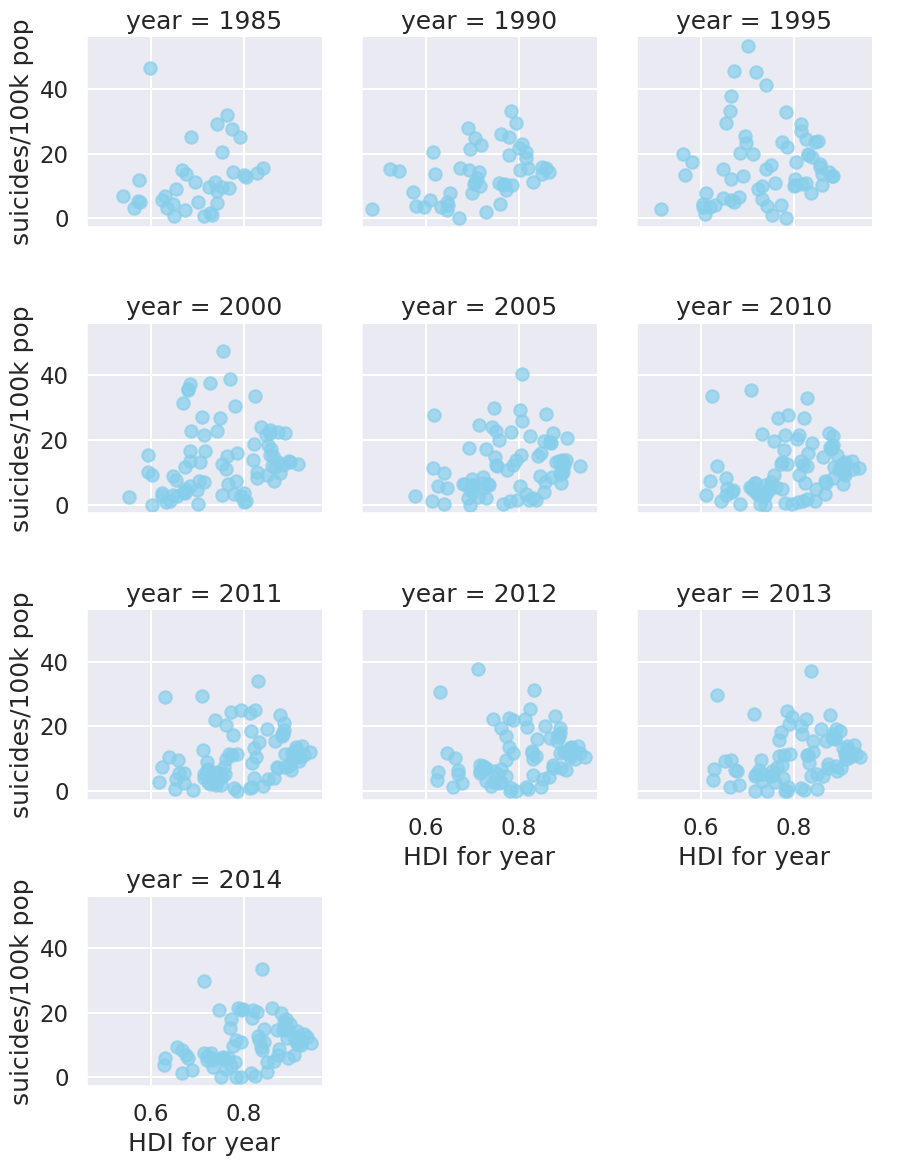

In [35]:
g = sns.FacetGrid(data_hdi_group, col = "year", col_wrap=3)
g.map(plt.scatter, "HDI for year", "suicides/100k pop", alpha=.7)
g.add_legend()

Que ce soit sur ces graphes ou les précédents nous observons de hauts taux de suicides dans les années 90 qui ont tendance à disparaître par la suite.

Au fur et a mesure que les pays se développent, il semble que le taux de suicide se concentre autour de la moyenne mondiale, et des valeurs extrêmement hautes sont de moins en moins observées.

# Suicide vs GDP : l'argent fait-il le bonheur ?

Il est intéressant de s'intéresser à l'influence de la richesse dans le taux de suicide d'un pays. Cette richesse peut être mesurée par le GDP par habitant (PIB en français).

Le produit intérieur brut (PIB) est l'indicateur économique qui permet de quantifier la valeur totale de la « production de richesse » annuelle effectuée par les agents économiques (ménages, entreprises, administrations publiques) résidant à l'intérieur d'un territoire.

Nous pouvons penser qu'un pays riche a un taux de suicide plus faible.

In [36]:
pd.isnull(data["gdp_per_capita ($)"]).value_counts()

gdp_per_capita ($)
False    27528
Name: count, dtype: int64

In [37]:
data_gdp = data
data_gdp

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27673  Uzbekistan  2014  female  35-54 years          107     3620833   
27674  Uzbekistan  2014  female    75+ years            9      348465   
27675  Uzbekistan  2014    male   5-14 years           60     2762158   
27676  Uzbekistan  2014  female   5-14 years           44     2631600   
27677  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   6.71     Albania1987           NaN      2,156,624,900   
1                   5.19     Albania1987           NaN      2,156,624,900   
2                   4.83     Albania1987           NaN      2,156,624,900   
3                   4.59     Albania1987           NaN      2,156,624,900   
4                   3.28     Albania1987           NaN      2,156,624,900   
...                  ...             ...           ...                ...   
27673               2.96  Uzbekistan2014         0.675     63,067,077,179   
27674               2.58  Uzbekistan2014         0.675     63,067,077,179   
27675               2.17  Uzbekistan2014         0.675     63,067,077,179   
27676               1.67  Uzbekistan2014         0.675     63,067,077,179   
27677               1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita ($)       generation continent  
0                     796     Generation X    Europe  
1                     796           Silent    Europe  
2                     796     Generation X    Europe  
3                     796  G.I. Generation    Europe  
4                     796          Boomers    Europe  
...                   ...              ...       ...  
27673                2309     Generation X      Asia  
27674                2309           Silent      Asia  
27675                2309     Generation Z      Asia  
27676                2309     Generation Z      Asia  
27677                2309          Boomers      Asia  

[27528 rows x 13 columns]

In [38]:
data_gdp_group = data_gdp.groupby(["country","year"])[["gdp_per_capita ($)","suicides/100k pop"]].mean().reset_index()
data_gdp_group

country  year  gdp_per_capita ($)  suicides/100k pop
0        Albania  1987               796.0           2.654167
1        Albania  1988               769.0           2.705000
2        Albania  1989               833.0           2.783333
3        Albania  1992               251.0           1.500000
4        Albania  1993               437.0           2.713333
...          ...   ...                 ...                ...
2289  Uzbekistan  2010              1533.0           5.269167
2290  Uzbekistan  2011              1767.0           5.595000
2291  Uzbekistan  2012              1964.0           6.460833
2292  Uzbekistan  2013              2150.0           6.571667
2293  Uzbekistan  2014              2309.0           7.093333

[2294 rows x 4 columns]

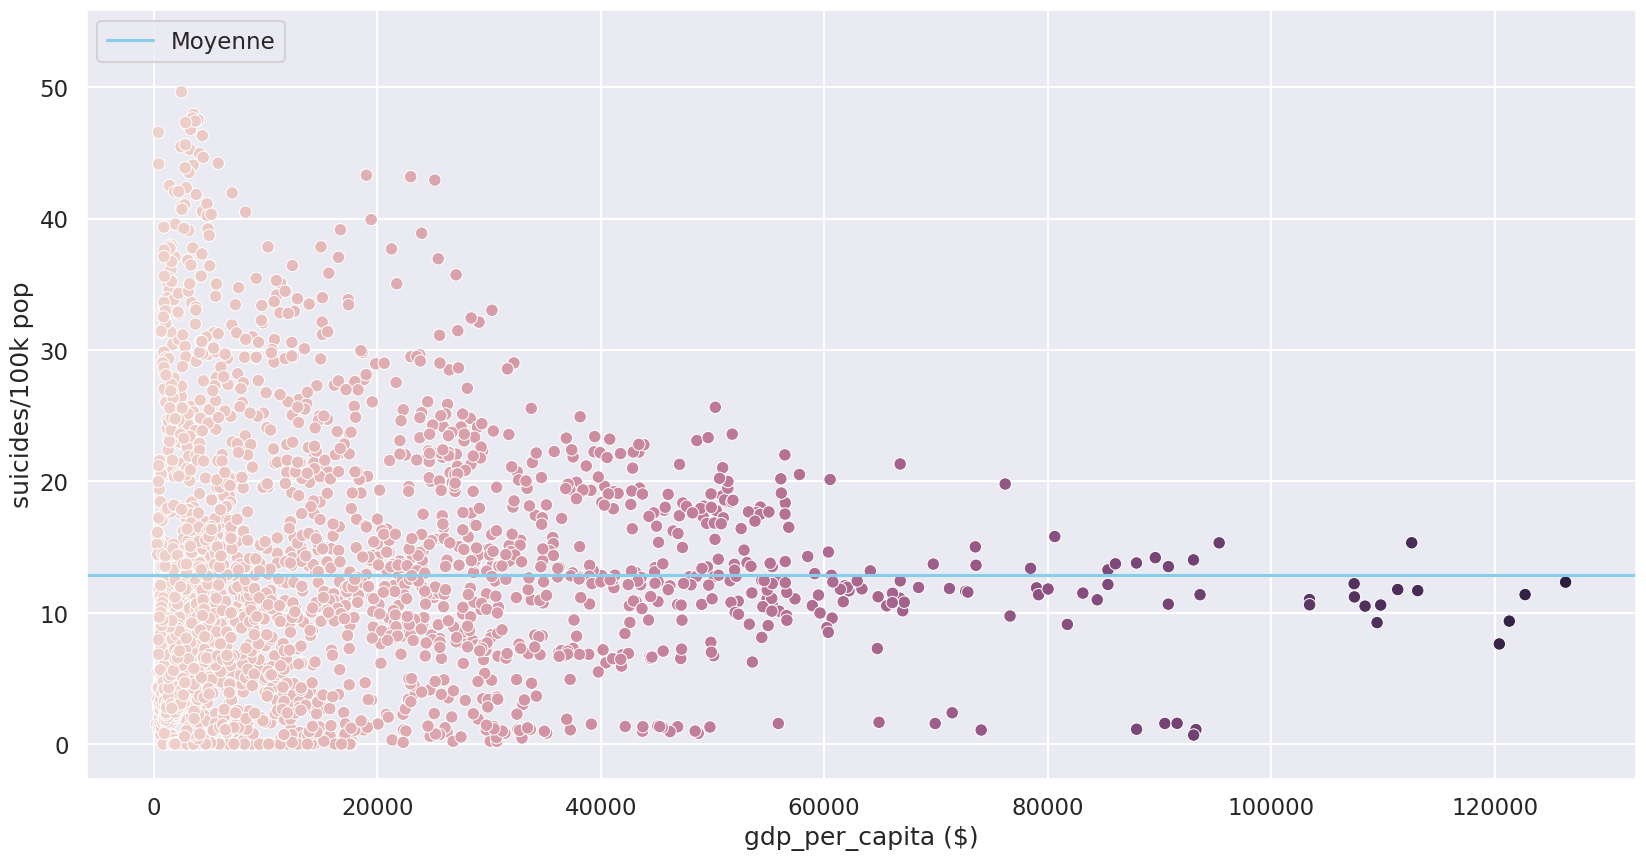

In [39]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="gdp_per_capita ($)", y="suicides/100k pop", data=data_gdp_group, hue = "gdp_per_capita ($)", legend = False)
plt.axhline(data_gdp_group["suicides/100k pop"].mean(), label = "Moyenne")
plt.legend(loc='upper left')

A l'aide de ce graphe nous pouvons penser que plus un pays est riche moins son taux de suicide est élevé. Simplement ce taux ne varie pas vers 0 mais vers la moyenne.

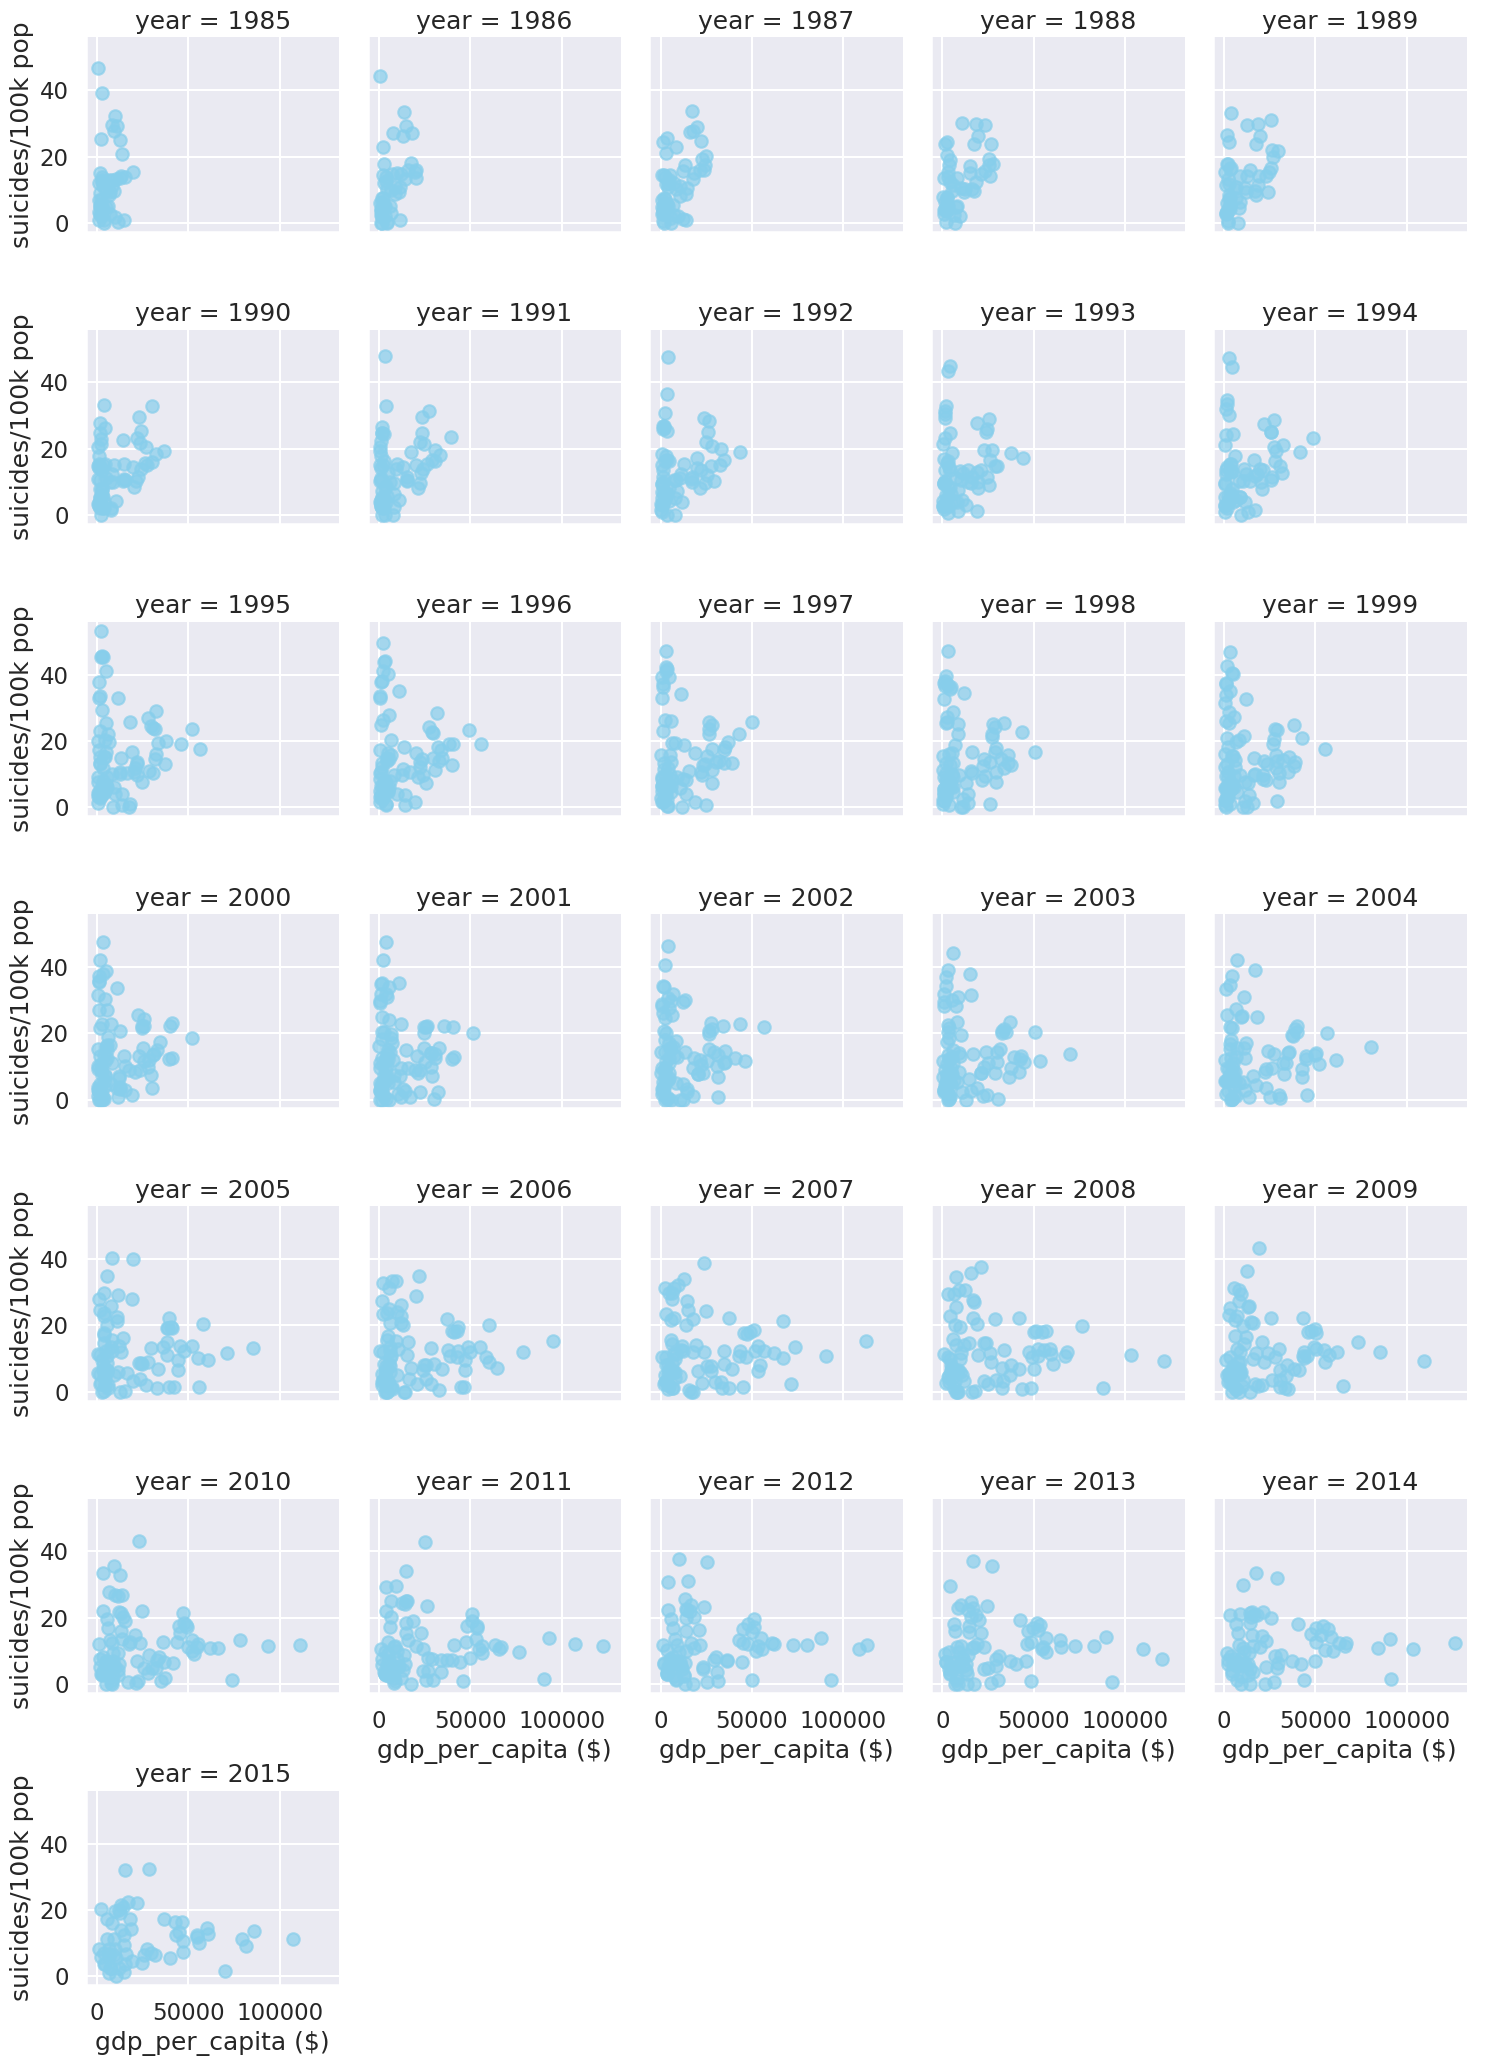

In [40]:
g = sns.FacetGrid(data_gdp_group, col = "year", col_wrap=5)
g.map(plt.scatter, "gdp_per_capita ($)", "suicides/100k pop", alpha=.7)
g.add_legend()

De la même manière que pour l'IDH, on observe que l'enrichissement des pays entraine une diminution du taux de suicide vers la moyenne mondiale.